In [1]:
# comments

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

In [3]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('claire.mcafee@gmail.com', 'Fhze5hUMn3')

if not status:
    print(msg)

In [4]:
path = 'datasets/'

In [5]:
def title_fix(title):
    if title[-5:] == ", The":
        return "The " + title[:-5]
    elif title[-3:] == ", A":
        return "A " + title[:-3]
    return title

dataset1_name = 'MovieBudgetsAndBoxOfficeEarnings.csv'
df1 = pd.read_csv(os.path.join(path, dataset1_name))
df1.head()

dataset2_name = 'IMDBMovieDatabase.csv'
df2 = pd.read_csv(os.path.join(path, dataset2_name))
df2.head()

df1 = df1.drop('Day', axis=1)
df2 = df2.drop(['var1', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10'], axis=1)
df1['title'] = df1['title'].apply(title_fix)
df2['title'] = df2['title'].apply(title_fix)


In [6]:
df = df1.merge(df2, on=['title', 'year'])
print(df)

                                                  title Month  year  \
0                                               Titanic   Dec  1997   
1         The Lord of the Rings: The Return of the King   Dec  2003   
2                                         Jurassic Park   Jun  1993   
3                                         The Lion King   Jun  1994   
4                                               Shrek 2   May  2004   
5                                          Finding Nemo   May  2003   
6                 The Lord of the Rings: The Two Towers   Dec  2002   
7     The Lord of the Rings: The Fellowship of the Ring   Dec  2001   
8               Harry Potter and the Chamber of Secrets   Nov  2002   
9                                            Spider-Man   May  2002   
10                                     Independence Day   Jul  1996   
11             Harry Potter and the Prisoner of Azkaban   Jun  2004   
12                                         Spider-Man 2   Jun  2004   
13    

(-0.659, 26.375]      936
(26.375, 52.749]      409
(52.749, 79.124]      228
(79.124, 105.498]     114
(105.498, 131.873]     82
(131.873, 158.247]     48
(158.247, 184.622]     44
(210.996, 237.371]     14
(184.622, 210.996]     13
(237.371, 263.746]     11
(290.12, 316.495]       7
(369.244, 395.618]      4
(263.746, 290.12]       4
(316.495, 342.869]      3
(395.618, 421.993]      2
(421.993, 448.367]      2
(448.367, 474.742]      1
(632.989, 659.364]      1
(606.615, 632.989]      0
(342.869, 369.244]      0
(474.742, 501.117]      0
(501.117, 527.491]      0
(527.491, 553.866]      0
(553.866, 580.24]       0
(580.24, 606.615]       0
Name: Domestic Gross($M), dtype: int64


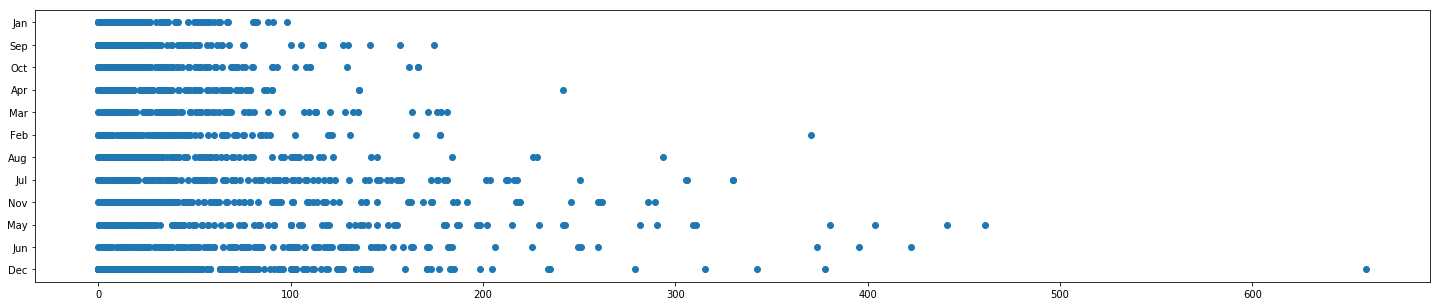

In [7]:

bins = pd.cut(df['Domestic Gross($M)'], bins=25).value_counts()
print(bins)

plt.figure(figsize=(25,5))
plt.scatter(x=df['Domestic Gross($M)'], y=df['Month'])



In [59]:
# Jacob having fun
import sklearn as sk

df['lame'] = 1
nd = df[['lame', 'Domestic Gross($M)']].copy()
km = sk.cluster.KMeans(n_clusters=2)
km.fit(nd)
km.labels_

KeyError: "['Domestic Gross($M)'] not in index"

In [8]:

df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x > 150 else 0)


In [9]:
df = df.drop(['Domestic Gross($M)', 'Worldwide Gross($M)'], axis=1)

df.head()

title Month  year  Budget($M)  \
0                                        Titanic   Dec  1997       200.0   
1  The Lord of the Rings: The Return of the King   Dec  2003        94.0   
2                                  Jurassic Park   Jun  1993        63.0   
3                                  The Lion King   Jun  1994        79.3   
4                                        Shrek 2   May  2004        70.0   

   length       budget  rating   votes   mpaa  Action  Animation  Comedy  \
0     194  200000000.0     6.9   90195  PG-13       0          0       0   
1     251   94000000.0     9.0  103631  PG-13       1          0       0   
2     127   63000000.0     7.4   57473    NaN       1          0       0   
3      89   79300000.0     7.8   32924    NaN       0          1       1   
4      92   75000000.0     7.8   27236     PG       0          1       1   

   Drama  Documentary  Romance  Short  label  
0      1            0        1      0      1  
1      0            0        0      0      1  
2      0            0        0      0      1  
3      0            0        0      0      1  
4      0            0        0      0      1

title Month  year  \
0                                               Titanic   Dec  1997   
1         The Lord of the Rings: The Return of the King   Dec  2003   
2                                         Jurassic Park   Jun  1993   
3                                         The Lion King   Jun  1994   
4                                               Shrek 2   May  2004   
5                                          Finding Nemo   May  2003   
6                 The Lord of the Rings: The Two Towers   Dec  2002   
7     The Lord of the Rings: The Fellowship of the Ring   Dec  2001   
8               Harry Potter and the Chamber of Secrets   Nov  2002   
9                                            Spider-Man   May  2002   
10                                     Independence Day   Jul  1996   
11             Harry Potter and the Prisoner of Azkaban   Jun  2004   
12                                         Spider-Man 2   Jun  2004   
13                         Star Wars Ep. IV: A New Hope   May  1977   
14                                  The Matrix Reloaded   May  2003   
15                                         Forrest Gump   Jul  1994   
16                                         Forrest Gump   Jul  1994   
17                                      The Sixth Sense   Aug  1999   
18               Star Wars Ep. II: Attack of the Clones   May  2002   
19    Pirates of the Caribbean: The Curse of the Bla...   Jul  2003   
20                            The Passion of the Christ   Feb  2004   
21                        The Lost World: Jurassic Park   May  1997   
22                                      The Incredibles   Nov  2004   
23                                         Men in Black   Jul  1997   
24                 Star Wars Ep. VI: Return of the Jedi   May  1983   
25                                       Monsters, Inc.   Nov  2001   
26                               The Day After Tomorrow   May  2004   
27                                           Armageddon   Jul  1998   
28             Star Wars Ep. V: The Empire Strikes Back   May  1980   
29                                                Ghost   Jul  1990   
...                                                 ...   ...   ...   
1893                                      Stolen Summer   Mar  2002   
1894                                       Freeze Frame   Dec  2004   
1895                                             Decoys   Feb  2004   
1896                                  The Hebrew Hammer   Dec  2003   
1897                                           Diamonds   Dec  1999   
1898                                     Silent Trigger   Dec  1996   
1899                                             Eulogy   Oct  2004   
1900                                            Nothing   Dec  2003   
1901                              Incident at Loch Ness   Sep  2004   
1902                                       Johnny Suede   Jan  1991   
1903                                   The Chumscrubber   Aug  2005   
1904                        Interview with the Assassin   Nov  2002   
1905                                            Jackpot   Jul  2001   
1906                               Chicken Tikka Masala   Dec  2005   
1907                                 This Thing of Ours   Jul  2003   
1908                                           Safe Men   Aug  1998   
1909                        Return of the Living Dead 3   Jan  1993   
1910                                              Sonny   Dec  2002   
1911                                              Molly   Oct  1999   
1912                             The Work and the Story   Oct  2003   
1913                                       Major Dundee   Apr  1965   
1914                                       The Specials   Sep  2000   
1915                  The Last Time I Committed Suicide   Jun  1997   
1916                                           Anatomie   Sep  2000   
1917                            Dreaming of Joseph Lees   Oct  1999   
191

In [41]:
# put dataframe into a csv file
resulting_csv = "result_data" + "-v1" + ".csv"

df.to_csv((path+resulting_csv), index=False)

In [46]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(path, resulting_csv))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [43]:
# clean dataset
target = "label"
status, job_id = ds.clean_data(resulting_csv, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T18:18:05.446109', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': ['8884f11befc94666b78678bb894a4a9d'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-02T18:18:05.446109', 'endtime': '2019-04-02T18:18:08.254191', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': ['8884f11befc94666b78678bb894a4a9d'], 'model_name': None, 'job_error': ''}


In [47]:
model = target + "_model" + "1"
status, job_id = ds.create_model(dataset_names = resulting_csv, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T18:23:23.791772', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T18:23:23.791772', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.35957038402557373, 'generations': 4, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T18:23:23.791772', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.35957038402557373, 'generations': 4, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T18:23:23.791772', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.

In [48]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = resulting_csv,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T18:25:40.564367', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10448481142520905, 'generations': 4, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T18:25:40.564367', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10448481142520905, 'generations': 7, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T18:25:40.564367', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.10448481142520905, 'generations': 7, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': None, 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T18:25:40.564367', 'endtime': None, 'percent_complete': 0, 'job_type': 'Updat

In [49]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-02T18:30:43.026026', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.09747752174735069, 'generations': 9, 'dataset_names': None, 'artifact_names': ['63a500e2b0d44cc7b41de1aad478bb9a'], 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T18:30:43.026026', 'endtime': '2019-04-02T18:30:51.579693', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.09747752174735069, 'generations': 9, 'dataset_names': None, 'artifact_names': ['63a500e2b0d44cc7b41de1aad478bb9a'], 'model_name': 'label_model1', 'job_error': ''}


In [50]:
feature_importance[:10]

votes           0.361462
Budget($M)      0.108461
rating          0.106259
budget          0.092667
length          0.070177
year            0.036081
mpaa = PG-13    0.034854
Month = May     0.030934
mpaa = R        0.025286
Action = 1      0.021637
dtype: float64

In [52]:
status, artifact = ds.run_model(resulting_csv, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-02T18:35:19.838416', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.09747752174735069, 'generations': 9, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': ['98855dd828564f30942b9b332f81beff'], 'model_name': 'label_model1', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T18:35:19.838416', 'endtime': '2019-04-02T18:35:28.276563', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.09747752174735069, 'generations': 9, 'dataset_names': ['result_data-v1.csv'], 'artifact_names': ['98855dd828564f30942b9b332f81beff'], 'model_name': 'label_model1', 'job_error': ''}


(True, 'Job completed')

In [53]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

label    prob_0    prob_1
0      1  0.135391  0.864609
1      1  0.329342  0.670658
2      1  0.383909  0.616091
3      1  0.247837  0.752163
4      1  0.216768  0.783232

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1807
           1       0.86      0.42      0.57       116

   micro avg       0.96      0.96      0.96      1923
   macro avg       0.91      0.71      0.77      1923
weighted avg       0.96      0.96      0.95      1923



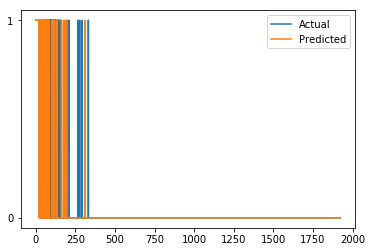

In [54]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [55]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 22}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'hardtanh', 'numunits': 25}}}, {'layer 3': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]
